<a href="https://colab.research.google.com/github/shintafiaa/Tel-U-ML-Course/blob/main/Week8%20SVM/W8_(7)_SVM_Classifier_from_Kaggle_Mobile_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cr: https://www.kaggle.com/prashant111/svm-classifier-tutorial/notebook#

In this kernel, I build a Support Vector Machines classifier to **classify a Pulsar star.** I have used the Predicting a Pulsar Star dataset for this project.

# Introduction to Support Vector Machines

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes.

#Support Vector Machines intuition
**SVM terminology:**
- Hyperplane<br>A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin.
- Support Vectors<br>Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.
- Margin<br>
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points

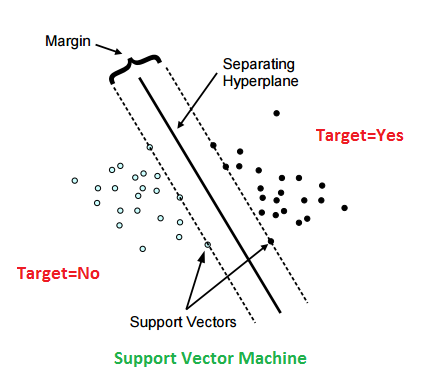

**Problem with dispersed datasets**

Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.

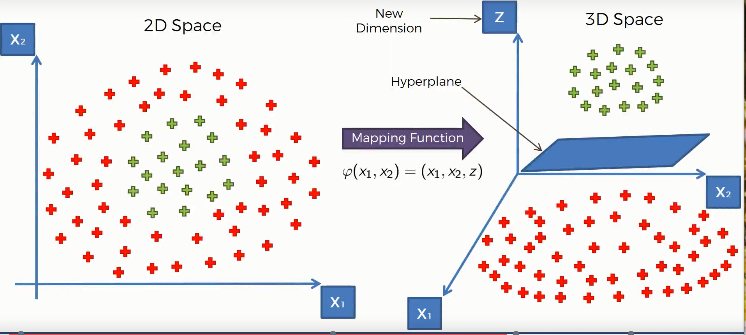

**Kinds of Kernel:**
In the context of SVMs, there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel

**Linear Kernel**
Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes.

Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time
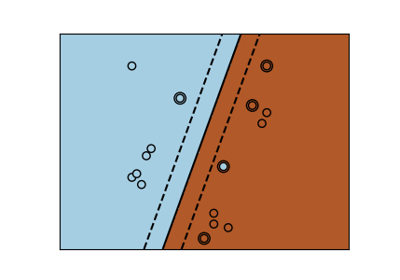

**Polynomial Kernel**
Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems.
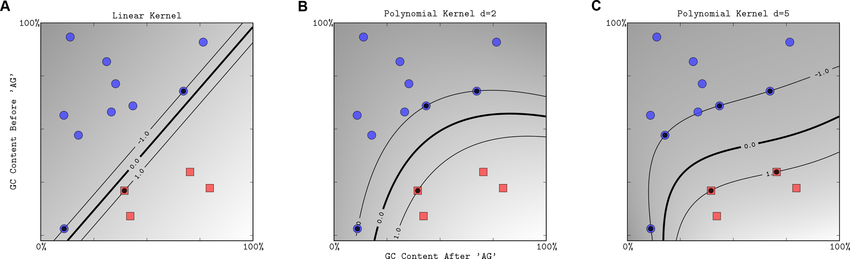

**Radial Basis Function Kernel**
It is used when we have no prior knowledge about the data.
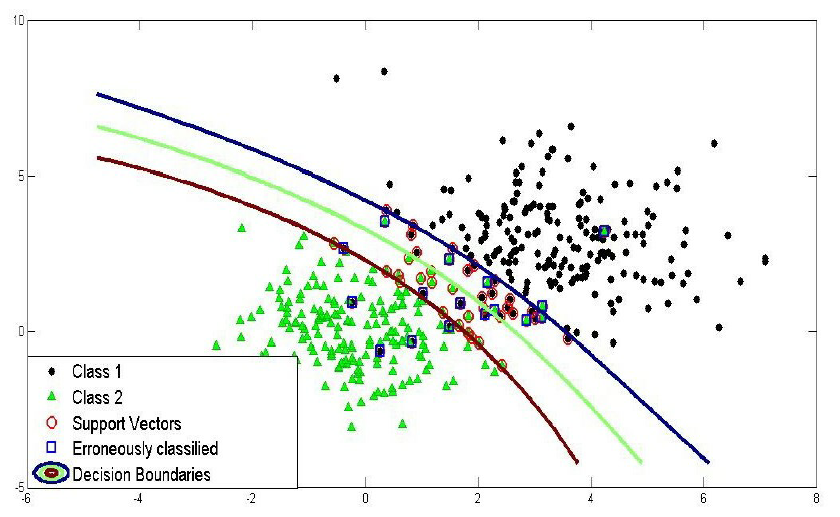

**Sigmoid kernel**

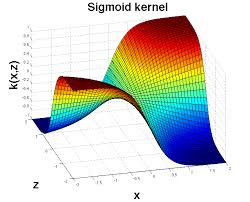



#Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
#https://www.kaggle.com/azzion/svm-for-beginners-tutorial/notebook
#https://www.kaggle.com/gulsahdemiryurek/mobile-price-classification-with-svm
#Mobile Price Classification
#The below topics are covered in this Kernal.

#1. Data prepocessing
#2. Target value Analysis
#3. SVM
#4. Linear SVM
#5. SV Regressor
#6. Non Linear SVM with kernal - RBF ( note: you can also try poly )
#7. Non Linear SVR
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
# A.DATA PREPROCESSING
# save filepath to variable for easier access
train_file_path = 'train (1).csv'
test_file_path = 'test (1).csv'
df = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Features Description:

1. battery_power: Total energy a battery can store in one time measured in mAh

2. blue: Has bluetooth or not

3. clock_speed: speed at which microprocessor executes instructions

4. dual_sim: Has dual sim support or not

5. fc: Front Camera mega pixels

6. four_g: Has 4G or not

7. int_memory: Internal Memory in Gigabytes

8. m_dep: Mobile Depth in cm

9. mobile_wt: Weight of mobile phone

10. n_cores: Number of cores of processor

11. pc: Primary Camera mega pixels

12. px_height: Pixel Resolution Height

13. px_width: Pixel Resolution Width

14. ram: Random Access Memory in Mega Bytes

15. sc_h: Screen Height of mobile in cm

16. sc_w: Screen Width of mobile in cm

17. talk_time: longest time that a single battery charge will last when you are

18. three_g: Has 3G or not

19. touch_screen: Has touch screen or not

20. wifi: Has wifi or not

21. price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [7]:
#B. TARGET VALUE ANALYSIS
#understanding the predicted value - which is hot encoded, in real life price won't be hot encoded.
df['price_range'].describe(), df['price_range'].unique()

# there are 4 classes in the predicted value

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64, array([1, 2, 3, 0]))

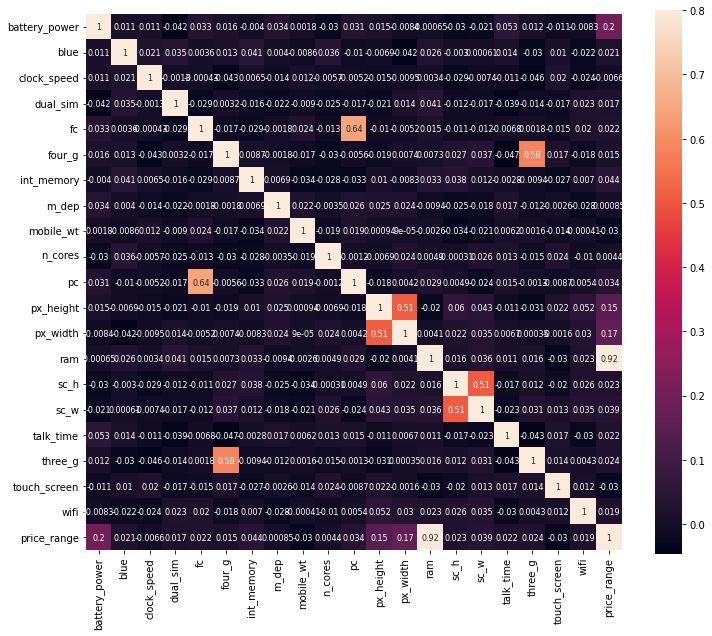

In [8]:
#correlation matrix with heatmap (mencari korelasi antar features, salah satu teknik features selection)
corrmat = df.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

In [9]:
#price range correlation
corrmat.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

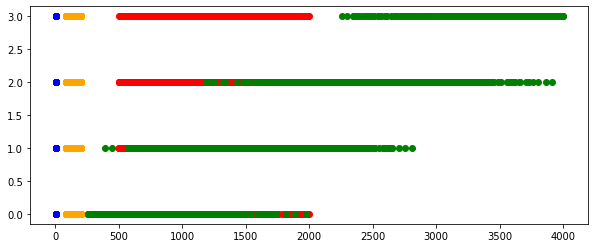

In [10]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='red')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='orange')
# clearly we can see that each of the category has different set of value ranges 

In [11]:
# SUPPORT VECTOR MACHINES AND METHODS :
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler #(scaling rentang 0-1)
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [13]:
for this_C in [1,3,5,10,40,60,80,100]: #parameter C di SVM Linier
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train) #clf = cross validate metrics for evaluating classification
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [14]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


In [15]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.24
Test Stratergy :stratified 
 Score :0.26
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.23
Test Stratergy :uniform 
 Score :0.22


In [16]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [18]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

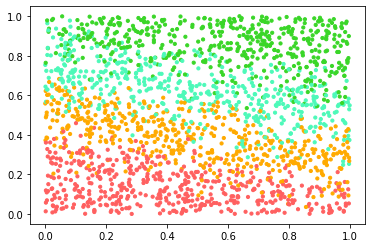

In [19]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

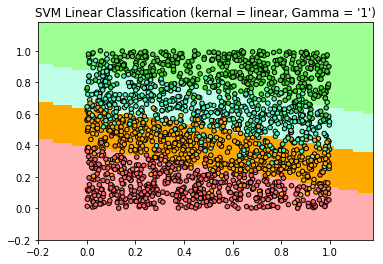

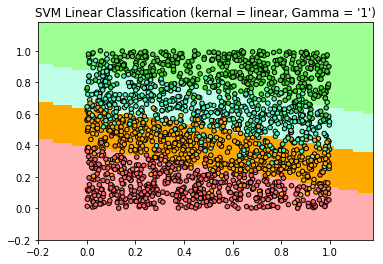

In [20]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (C_param))

plt.show()

In [21]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [22]:
# Linear Support vector machine with only C Parameter 
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:5, training score :0.868125 , Test Score: 0.870000 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:10, training score :0.871875 , Test Score: 0.870000 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:40, training score :0.872500 , Test Score: 0.870000 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:60, training score :0.750625 , Test Score: 0.767500 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Linear SVM value of C:80, training score :0.836875 , Test Score: 0.830000 

Linear SVM value of C:100, training score :0.724375 , Test Score: 0.737500 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [23]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


In [24]:
#NON LINIER SVM
# SMV with RBF KERNAL AND ONLY C PARAMETER 

for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.969375 Test Score : 0.862500

SVM for Non Linear 
 C:5 Training Score : 0.998750 Test Score : 0.872500

SVM for Non Linear 
 C:10 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:25 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:50 Training Score : 1.000000 Test Score : 0.877500

SVM for Non Linear 
 C:100 Training Score : 1.000000 Test Score : 0.877500



In [25]:
# SVM WITH RBF KERNAL, C AND GAMMA HYPERPARAMTER 
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [26]:
# grid search method 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [27]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]})

In [28]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.90.


In [29]:
# Kernalized SVM machine 
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

1.00 is the accuracy of the SV Regressor


In [30]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [31]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [32]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [33]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.443312
1,1.443312
2,1.443312
3,1.443312
4,1.443312
